# Sender
----

In [20]:
# imported libraries
import cv2 as cv
import matplotlib.pyplot as plt
from lib.conversion import *
from lib.encrypt import *
from lib.PRBG import *                  # import pseudo random binary number generator module

In [21]:
# read an image file
img = cv.imread('test-images/miscellaneous/4.1.04.tiff', cv.IMREAD_GRAYSCALE)
print("Image document type is: {}".format(img.dtype))

Image document type is: uint8


Text(0.5, 1.0, 'original')

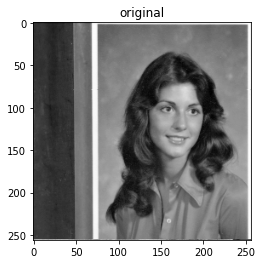

In [22]:
# showing image using matplotlib
plt.imshow(img, cmap='gray')
plt.title('original')

In [23]:
# getting image height and width
height = img.shape[0]
width = img.shape[1]
print("height: {}, width: {}".format(height, width))

height: 256, width: 256


### Bitplanes Decomposition

In [24]:
# obtaining bitplanes
encp = Encryption()
bitplane_images = encp.bitplane_decomposition(img, height, width)
titles = ['bitplane8',
          'bitplane7',
          'bitplane6',
          'bitplane5',
          'bitplane4',
          'bitplane3',
          'bitplane2',
          'bitplane1']

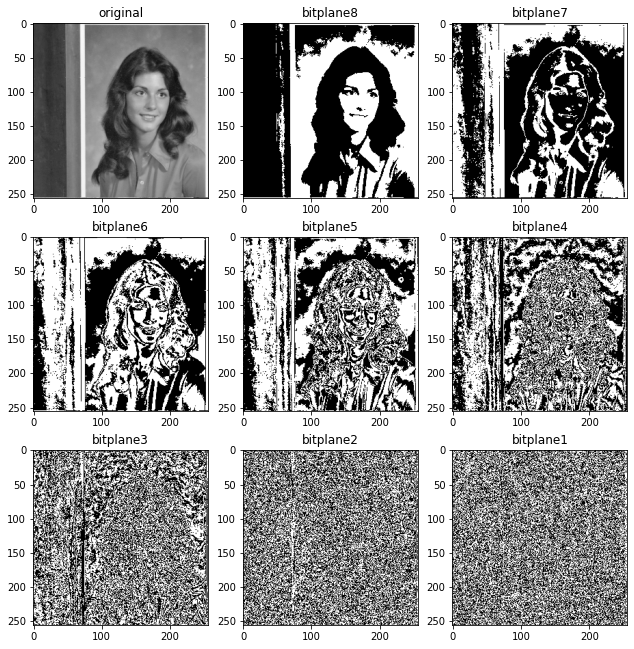

In [25]:
# viewing bitplane images
plt.subplot(3,3,1)
plt.title('original')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

for i in range(8):
    plt.subplot(3,3,i+2)
    plt.title(titles[i])
    plt.imshow(convert_to_255(bitplane_images[i]), cmap='gray', vmin=0, vmax=255)

plt.subplots_adjust(bottom=0.1, right=1.5, top=2.2)

### Cipher Image Generation

In [26]:
# CCCBG
diffusion_range = 5
cccbg = CCCBG(.5, .7)

mats = []
for i in range(diffusion_range):
    bitplane_images[i] = cv.bitwise_xor(cccbg.generateMatrix(height, width), bitplane_images[i])
    mats.append(cccbg.generateMatrix(height, width))

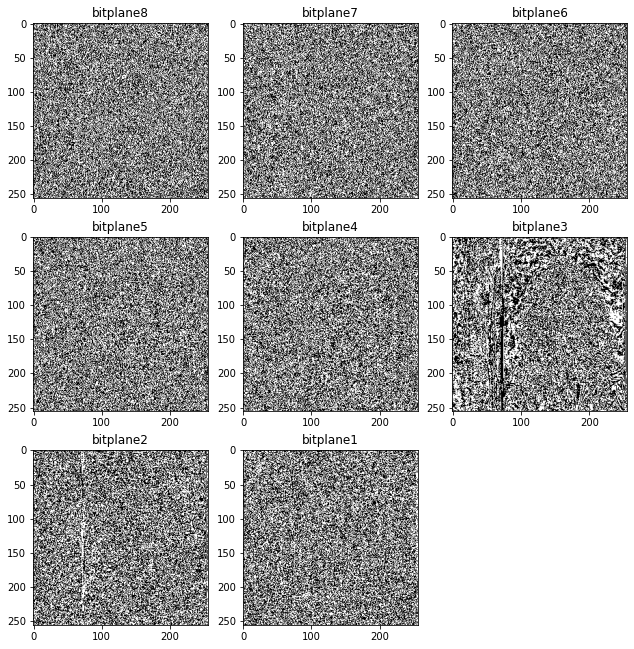

In [27]:
# viewing bitplane images
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.title(titles[i])
    plt.imshow(convert_to_255(bitplane_images[i]), cmap='gray', vmin=0, vmax=255)
plt.subplots_adjust(bottom=0.1, right=1.5, top=2.2) 

True

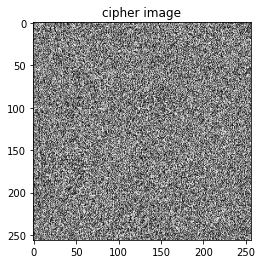

In [28]:
cipher_image = cipher_image_composition(bitplane_images, height, width)
plt.title('cipher image')
plt.imshow(cipher_image, cmap='gray')

cv.imwrite('cipherImage.tiff', cipher_image)

# Testing
----

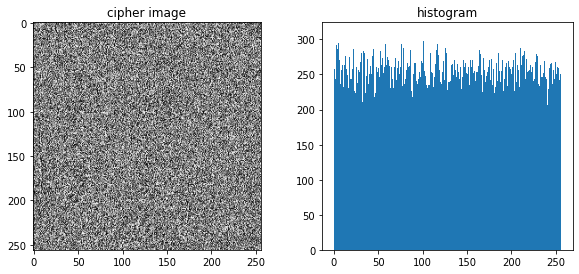

In [29]:
# histogram analysis
plt.subplot(1,2,1)
plt.title('cipher image')
plt.imshow(cipher_image, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title('histogram')
plt.hist(cipher_image.ravel(), 256, [0,256])
plt.subplots_adjust(bottom=.01, right=1.4, top=.8)

In [30]:
# corellation coefficient for original image
corr = float('{:.2f}'.format(
    cv.matchTemplate(
        img,
        horizontal_adj(img, height, width),
        cv.TM_CCORR_NORMED)[0][0]))
print('Corellation coefficient of original image: {}'.format(corr))

Corellation coefficient of original image: 1.0


In [31]:
# corellation coefficient for cipher image
corr = float('{:.2f}'.format(
    cv.matchTemplate(
        cipher_image,
        horizontal_adj(cipher_image, height, width),
        cv.TM_CCORR_NORMED)[0][0]))
print('Corellation coefficient of cipher image: {}'.format(corr))

Corellation coefficient of cipher image: 1.0


In [32]:
# calculate entropy of the image
print('Entropy of the cipher image is: {:.2f}'.format(entropy(cipher_image)))

Entropy of the cipher image is: 7.94
